# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + '&units=metric' 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try: 
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | muros
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | norman wells
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | mackay
Processing Record 6 of Set 1 | iberia
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | lieksa
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | oktyabrskiy
Processing Record 11 of Set 1 | hamilton
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | pocone
Processing Record 14 of Set 1 | olafsvik
Processing Record 15 of Set 1 | pangnirtung
Processing Record 16 of Set 1 | mahebourg
Processing Record 17 of Set 1 | clyde river
Processing Record 18 of Set 1 | kruisfontein
Processing Record 19 of Set 1 | saldanha
Processing Record 20 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 21 of Set 1 | port-gentil
Processing Record 22 of Set 1 | mount gambie

City not found. Skipping...
Processing Record 39 of Set 4 | pevek
Processing Record 40 of Set 4 | kegayli
City not found. Skipping...
Processing Record 41 of Set 4 | qaanaaq
Processing Record 42 of Set 4 | grand gaube
Processing Record 43 of Set 4 | oranjemund
Processing Record 44 of Set 4 | betioky
Processing Record 45 of Set 4 | manokwari
Processing Record 46 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 47 of Set 4 | bardiyah
Processing Record 48 of Set 4 | baykit
Processing Record 49 of Set 4 | chokurdakh
Processing Record 0 of Set 5 | thohoyandou
Processing Record 1 of Set 5 | lavrentiya
Processing Record 2 of Set 5 | dunedin
Processing Record 3 of Set 5 | artigas
Processing Record 4 of Set 5 | guerrero negro
Processing Record 5 of Set 5 | half moon bay
Processing Record 6 of Set 5 | mar del plata
Processing Record 7 of Set 5 | severo-kurilsk
Processing Record 8 of Set 5 | nouadhibou
Processing Record 9 of Set 5 | zhengjiatun
Processing Record 10 of Set 5 |

Processing Record 26 of Set 8 | lydenburg
Processing Record 27 of Set 8 | mizan teferi
Processing Record 28 of Set 8 | qom
Processing Record 29 of Set 8 | quatre cocos
Processing Record 30 of Set 8 | yermolayevo
Processing Record 31 of Set 8 | tukrah
Processing Record 32 of Set 8 | bengkulu
Processing Record 33 of Set 8 | ardmore
Processing Record 34 of Set 8 | riyadh
Processing Record 35 of Set 8 | maloy
Processing Record 36 of Set 8 | kostomuksha
Processing Record 37 of Set 8 | gore
Processing Record 38 of Set 8 | bathsheba
Processing Record 39 of Set 8 | jalu
Processing Record 40 of Set 8 | paamiut
Processing Record 41 of Set 8 | north bend
Processing Record 42 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 43 of Set 8 | monrovia
Processing Record 44 of Set 8 | sao jose da coroa grande
Processing Record 45 of Set 8 | skjervoy
Processing Record 46 of Set 8 | evensk
Processing Record 47 of Set 8 | saru dornei
Processing Record 48 of Set 8 | kloulklubed
Processi

Processing Record 18 of Set 12 | fort nelson
Processing Record 19 of Set 12 | vanimo
Processing Record 20 of Set 12 | cabo rojo
Processing Record 21 of Set 12 | umm lajj
Processing Record 22 of Set 12 | thurso
Processing Record 23 of Set 12 | straja
Processing Record 24 of Set 12 | kaniama
Processing Record 25 of Set 12 | najran
Processing Record 26 of Set 12 | katunino
Processing Record 27 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 28 of Set 12 | malkangiri
Processing Record 29 of Set 12 | mitsamiouli
Processing Record 30 of Set 12 | panacan
Processing Record 31 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 32 of Set 12 | tubmanburg
Processing Record 33 of Set 12 | manjeshwar
Processing Record 34 of Set 12 | atbasar
Processing Record 35 of Set 12 | majene
Processing Record 36 of Set 12 | havoysund
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,muros,42.7762,-9.0603,3.80,83,20,5.60,ES,1675926258
1,ushuaia,-54.8000,-68.3000,8.81,93,0,4.12,AR,1675926258
2,norman wells,65.2820,-126.8329,-23.98,70,100,1.03,CA,1675926259
3,albany,42.6001,-73.9662,0.45,83,99,0.45,US,1675925997
4,mackay,-21.1500,149.2000,28.71,74,95,10.49,AU,1675926154


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,muros,42.7762,-9.0603,3.80,83,20,5.60,ES,1675926258
1,ushuaia,-54.8000,-68.3000,8.81,93,0,4.12,AR,1675926258
2,norman wells,65.2820,-126.8329,-23.98,70,100,1.03,CA,1675926259
3,albany,42.6001,-73.9662,0.45,83,99,0.45,US,1675925997
4,mackay,-21.1500,149.2000,28.71,74,95,10.49,AU,1675926154


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

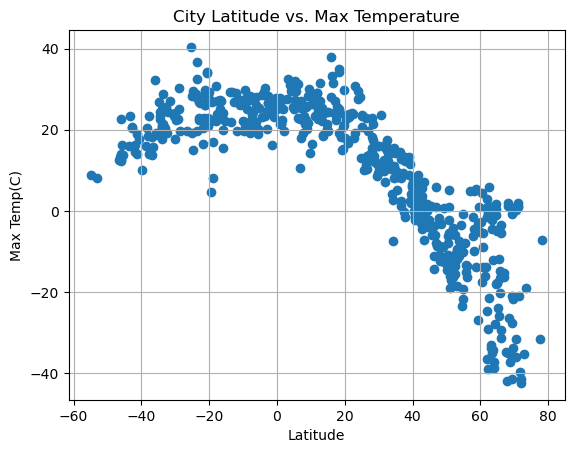

In [25]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temp(C)')
plt.title('City Latitude vs. Max Temperature')
plt.grid()


# Save the figure
plt.savefig("../output_data/CitLatvTemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

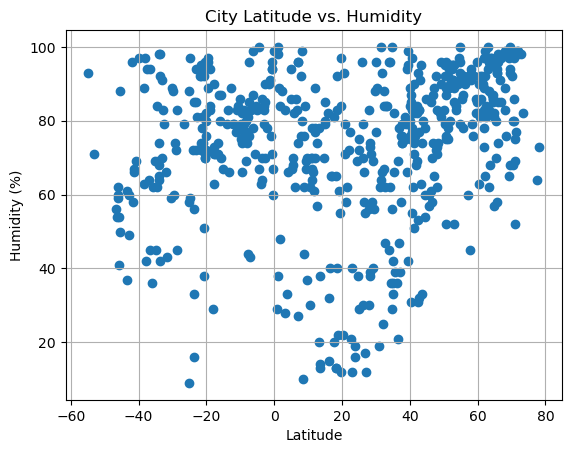

In [26]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.grid()

# Save the figure
plt.savefig("../output_data/CitLatvHum.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

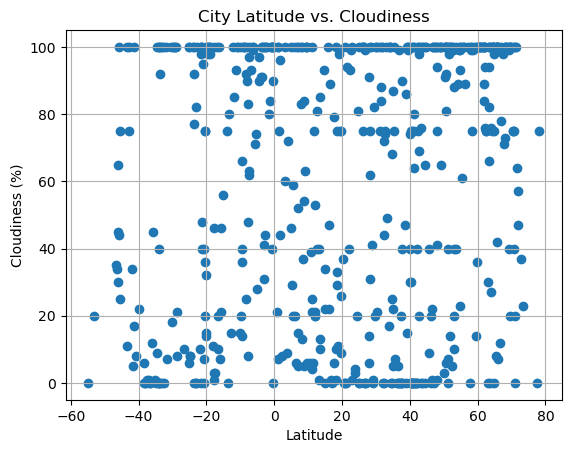

In [27]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')
plt.grid()

# Save the figure
plt.savefig("../output_data/CitLatvCld.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

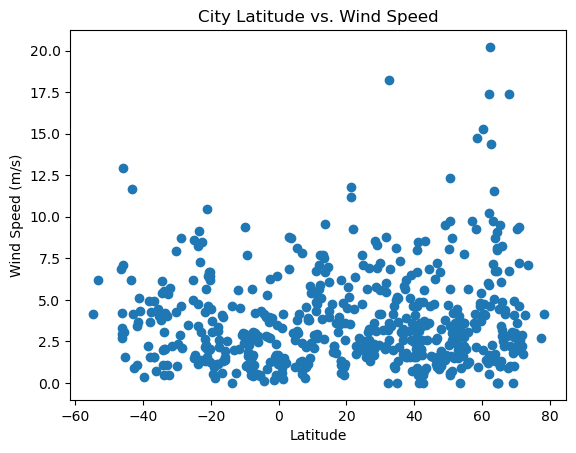

In [28]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed')

# Save the figure
plt.savefig("../output_data/CitLatvWnd.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,muros,42.7762,-9.0603,3.80,83,20,5.60,ES,1675926258
2,norman wells,65.2820,-126.8329,-23.98,70,100,1.03,CA,1675926259
3,albany,42.6001,-73.9662,0.45,83,99,0.45,US,1675925997
5,iberia,29.9502,-91.7507,16.04,77,100,7.20,US,1675926260
7,lieksa,63.3167,30.0167,0.94,83,100,9.76,FI,1675926261


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,8.81,93,0,4.12,AR,1675926258
4,mackay,-21.1500,149.2000,28.71,74,95,10.49,AU,1675926154
6,hobart,-42.8794,147.3294,20.70,60,75,4.12,AU,1675926040
11,puerto ayora,-0.7393,-90.3518,25.31,94,100,0.45,EC,1675926262
12,pocone,-16.2567,-56.6228,22.92,87,100,1.31,BR,1675926263


###  Temperature vs. Latitude Linear Regression Plot

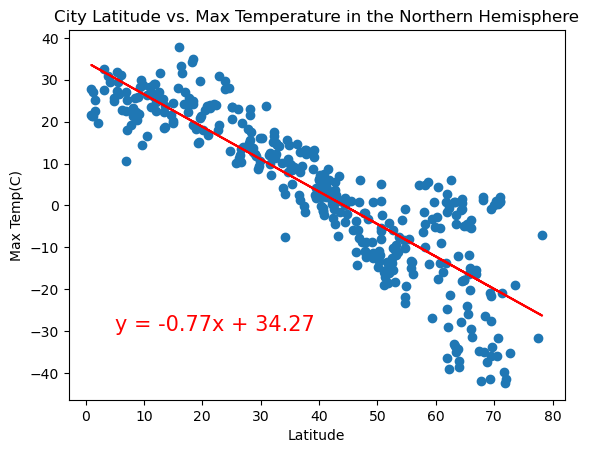

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,-30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp(C)')
plt.title('City Latitude vs. Max Temperature in the Northern Hemisphere')

plt.savefig("../output_data/NorHemiTempvLat.png")

# Show plot
plt.show()

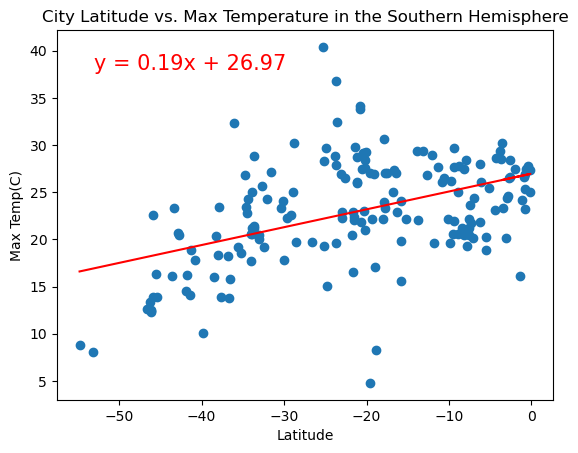

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-53,38),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp(C)')
plt.title('City Latitude vs. Max Temperature in the Southern Hemisphere')

plt.savefig("../output_data/SudHemiTempvLat.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** We can see that, on average, as we near the equator, the temperature rises.

### Humidity vs. Latitude Linear Regression Plot

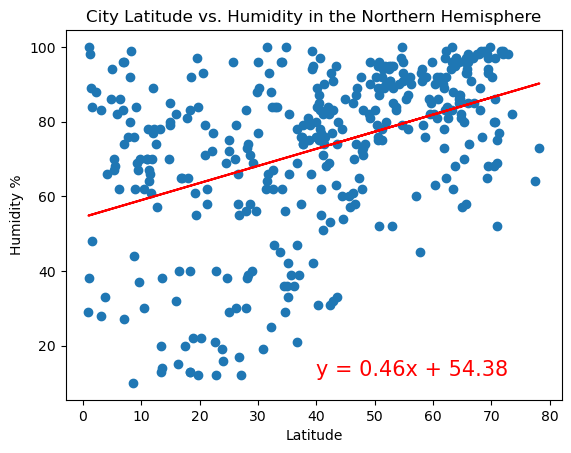

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('City Latitude vs. Humidity in the Northern Hemisphere')

plt.savefig("../output_data/NorHemiHumvLat.png")

# Show plot
plt.show()

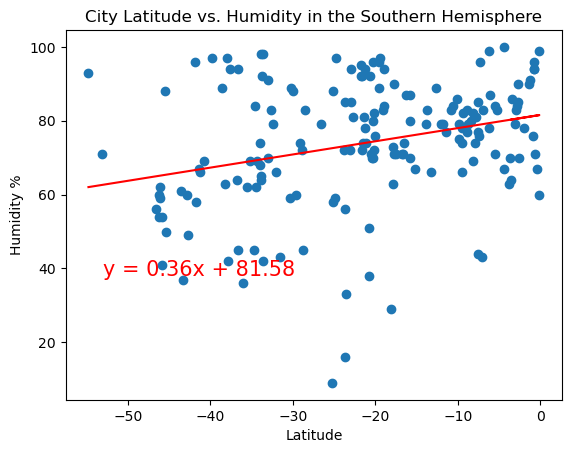

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-53,38),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('City Latitude vs. Humidity in the Southern Hemisphere')

plt.savefig("../output_data/SudHemiHumvLat.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** From the graph, as we head more north, the humidity rises, however all results are incredibly varied, and this is likely due more to environmental conditions than longitudinal positioning.

### Cloudiness vs. Latitude Linear Regression Plot

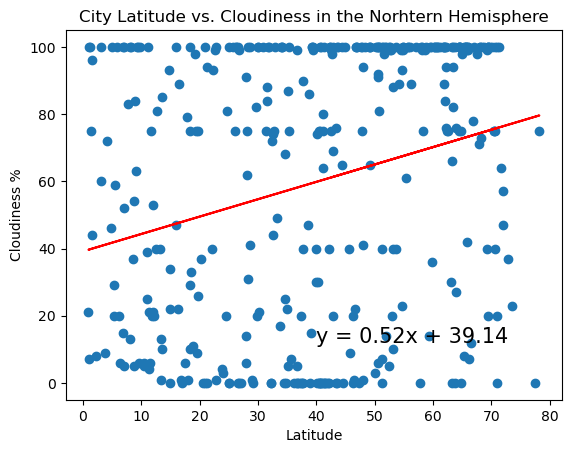

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,12),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('City Latitude vs. Cloudiness in the Norhtern Hemisphere')

plt.savefig("../output_data/NorHemiCldvLat.png")

# Show plot
plt.show()

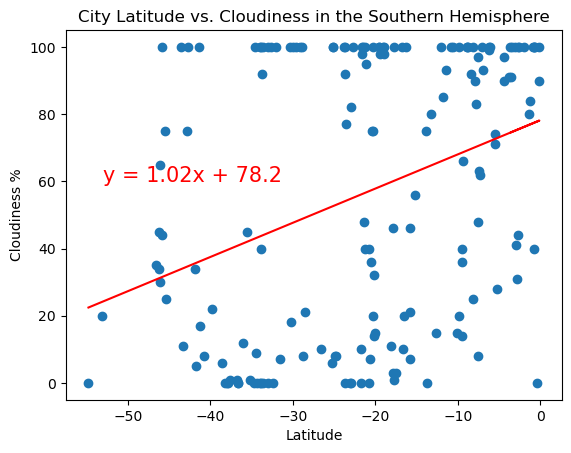

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-53,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('City Latitude vs. Cloudiness in the Southern Hemisphere')

plt.savefig("../output_data/SudHemiCldvLat.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Like humidity, the further north we go, the higher a chance of cloudiness, however also like humidity, there are huge extremes and compparing against latitude may not be the best choice here.

### Wind Speed vs. Latitude Linear Regression Plot

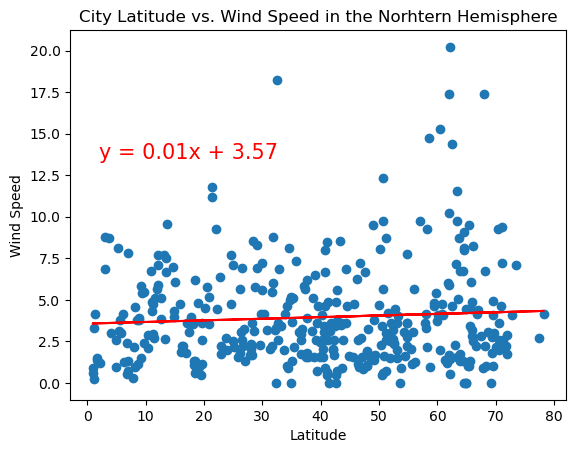

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,13.5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed in the Norhtern Hemisphere')

plt.savefig("../output_data/NorHemiWndvLat.png")

# Show plot
plt.show()

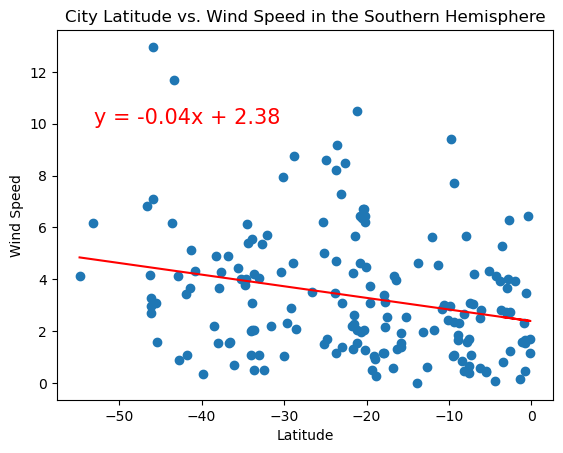

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-53,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed in the Southern Hemisphere')

plt.savefig("../output_data/SudHemiWndvLat.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** We see similar rises in both hemispheres in wind speed as we approach the equator with many of the most extreme winds near the equator. This likely indicates tropic conditions may be contributing to higher wind speeds.